# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## 1. Изучаем общую информацию

In [1]:
import pandas as pd

In [2]:
data_games=pd.read_csv('/datasets/games.csv')
print(data_games.head())
data_games.info()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

В таблице 8 столбцов. Есть пропущенные значения в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Возможно нужно будет заполнить пропуски. Также нужно заменить типы данных в столбцах Year_of_Release, User_Score, Rating. Названия столбцов нужно привести к нижнемы регистру.

## 2. Подготовка данных

### 2.1 Приводим названия столбцов к нижнему регистру

In [3]:
data_games.columns = map(str.lower, data_games.columns)
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Обработка данных

In [4]:
# Посчитаем есть ли дублирующиеся строки
data_games.duplicated(subset=None, keep=False).sum()

0

В таблице нет дупликатов.

In [5]:
# посмотрим в каких столбцах есть пропущенные значения
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропущенные значения есть в столбцах name, year_of_release, genre, critic_score, rating

### 2.2.1 Работа со столбцами name и genre

In [6]:
# удалим  строки с пустыми занчениями в столбцах name и genre:
data_games=data_games.dropna(subset=['name','genre']).reset_index(drop=True)
data_games.info()
data_games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенные значения в столбцах name и genre содержат всего 0,01% информации. Используя метод dropna пустые строки в столбцах name и genre были удалены.

### 2.2.2 Работа со столбцом year_of_release

In [7]:
#заменим пустые значения в стобце year_of_release на ноль:
data_games['year_of_release']=data_games['year_of_release'].fillna(0)

В столбце year_of_release было решено заменить пропущенные значения на ноль, так как восстановить данные не представляется возможным, а замена на ноль позволяет избежать потери 1,6% данных.

In [8]:
# заменим тип данных в столбце year_of_release на int:
data_games['year_of_release']=data_games['year_of_release'].astype('int')

Теперь столбцу year_of_release соответствует тип данных integer.

### 2.2.3 Работа со столбцами critic_score и user_score

In [9]:
# Посмотрим какие есть уникальные значения в столбце critic_score
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В столбце есть пропущенные значения, кроме того все значения целочисленные. Имеет смысл заменить тип данных на integer

In [10]:
# Посмотрим какие есть уникальные значения в столбце user_score
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть пропущенные значения. Также данные с аббревеатурой tbd, что означает to be declared. То есть данные есть, но они ещё не анонсированы. Думаю tbd можно заменить на 0.0. 

In [11]:
#изменим тип данных в столбце user_score:
data_games['user_score']=pd.to_numeric(data_games['user_score'],errors='coerce')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
data_games['critic_score']=data_games['critic_score'].fillna(0)

data_games['user_score']=data_games['user_score'].fillna(0)
data_games['user_score']=data_games['user_score'].where(data_games['user_score']!='tbd','0')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Заменили тип данных в столбце user_score с object на float.Заменили NaN и tbd на ноль, так как рейтинги игры невозможно установить. Замена NaN на среднее или медиану только исказит результаты. Если поставить средний рейтинг по жанру, то это тоже не будет отображать реальную картину. Во многих строках NaN присутствует и в столбце critic_score и в столбце user_score, возможно данные отзывов неизвестны.

### 2.2.4 Работа со столбцом rating

In [13]:
# Посмотрим какие есть уникальные значения в столбце rating
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видим, что в столбце rating  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Значение "K-A" это более ранняя версия значения "E"("Everyone"). Поэтому его нужно заменитьт на "E". Пропущенных значений много, но пока оставим строки пустыми, возможно, для них возрастной рейтинг не определлен.

In [14]:
# Заменим значения 'K-A' в столбце rating на 'E'
data_games['rating']=data_games['rating'].where(data_games['rating']!='K-A','E')
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

### 2.3 Считаем суммарные продажи во всех регионах

In [15]:
data_games['sum_sales']=data_games['na_sales']+data_games['eu_sales']+data_games['jp_sales']+data_games['other_sales']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


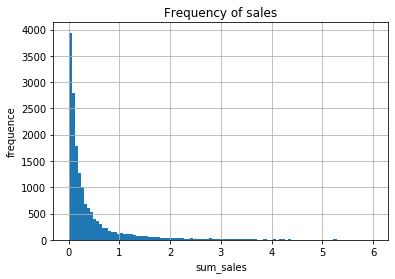

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sum_sales, dtype: float64

In [16]:
import matplotlib.pyplot as plt
# построим гистограмму, показывающую сумму продаж игр на рынке
data_games.hist(['sum_sales'],bins=100, range=(0,6))
plt.title('Frequency of sales')
plt.xlabel('sum_sales')
plt.ylabel('frequence')
plt.show()
data_games['sum_sales'].describe()

По гистограмме видно, что сумма продаж в 4000 случаях составляет 0,1 миллион долларов.

## 3. Исследовательский анализ данных

### 3.1 Посчитаем число  игр в разные года

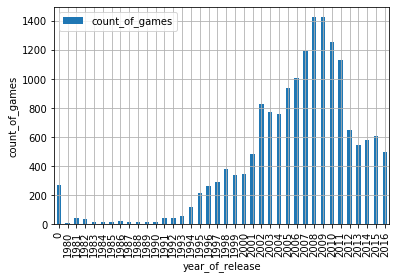

In [17]:
games_in_year=data_games.pivot_table(index=('year_of_release'),values=('name'),aggfunc=('count')).reset_index()
games_in_year=games_in_year.rename(columns={'name':'count_of_games'})
games_in_year.plot(x='year_of_release',y='count_of_games',kind='bar',stacked=True,grid=True)
plt.ylabel('count_of_games')
plt.show()


Нулевые года - те, у которых нет дат выхода. Их удалять не будем, так как данные строк могут пригодиться для других расчётов.
Получили скошенный влево набор данных. До 1994 года на рынке выходило довольно мало игр. При этом кол-во игр до 2016 не падало меньше значений 2001 года, но заметно уменьшается с 2009 года, особенно резко произошёл спад в 2012 году. Думаю актуальный период анализа составляет с 2001 года по 2016.
<div> Наибольшие показатели приходятся на 2008 и 2009 года.</div>

### 3.2 Число игр для платформ с наибольшими показателями по годам

In [18]:
# создадим сводную таблицу c уровнем продаж для каждой платформы по годам
sales_for_platform=data_games.pivot_table(index=['platform'],values=['sum_sales'],aggfunc=('sum')).reset_index()
sales_for_platform.sort_values(by='sum_sales', ascending=False).reset_index(drop=True)

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Наиболее выгодные платформы по продажам начинаются с 17 позиции списка.

In [19]:
# создадим список платформ c наибольшим числом продаж
sales_for_platform_top=sales_for_platform.query('sum_sales>=159.32').reset_index()
top_platforms=sales_for_platform_top['platform']
top_platforms

0      3DS
1       DS
2       GB
3      GBA
4       GC
5      N64
6      NES
7       PC
8       PS
9      PS2
10     PS3
11     PS4
12     PSP
13    SNES
14     Wii
15    X360
16      XB
17    XOne
Name: platform, dtype: object

In [20]:
# сделаем срез для платформ из списка top_platforms
data_games_top=data_games[data_games['platform'].isin(top_platforms)].reset_index(drop=True)
data_games_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
15715,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN,0.01
15716,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00
15717,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
15718,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN,0.01


(1980, 2016)

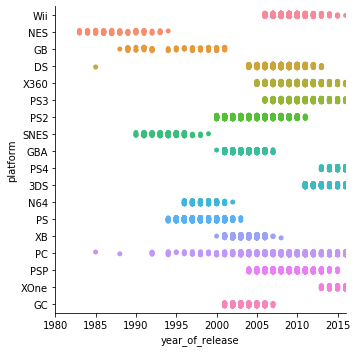

In [21]:
# строим распределение по годам для таблицы data_games_top
import seaborn as sns
sns.catplot(x='year_of_release',y='platform',data=data_games_top)
plt.xlim(1980, 2016)

Судя по графику от создания платформы и до её исчезновения проходит от 7 до 12 лет. Платформа PС выбивается из общего правила, так как является не только игровой платформой. 

### 3.3 Изучим данные для актуального промежутка времени

Нас интересуют развивающиеся и находящиеся на пике платформы. Поэтому выберем промежуток времени с 2012 по 2016 год.

In [22]:
#сделаем срез данных для актуального промежутка времени
data_games_period=data_games_top.query('2012<=year_of_release<=2016').reset_index(drop=True)
data_games_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2323,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,0.0,0.0,T,0.01
2324,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
2325,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.01
2326,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


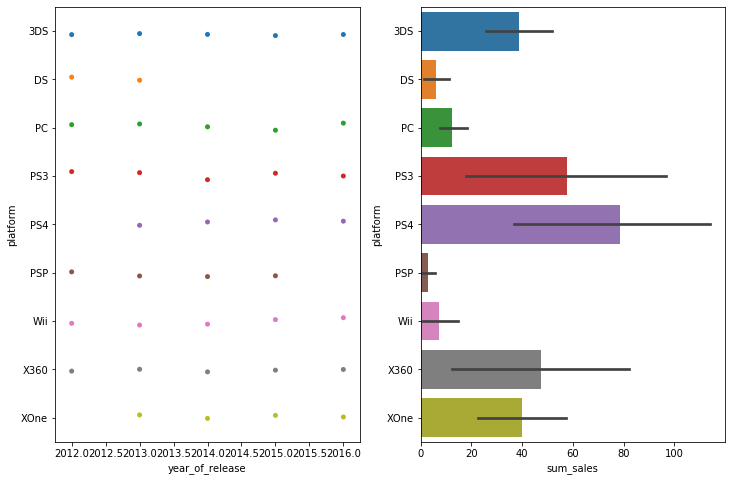

In [23]:
# определим топ платформ по продажам
platform_analys=data_games_period.pivot_table(index=['platform','year_of_release'],values=['sum_sales'],
                                              aggfunc=('sum')).reset_index()
from matplotlib.pyplot import subplots, show
fig, axs=plt.subplots(1,2, figsize=(12,8))
ax1=sns.catplot(x='year_of_release',y='platform', data=platform_analys, ax=axs[0])
sns.catplot(x='sum_sales',y='platform', kind='bar',data=platform_analys, ax=axs[1])
plt.close(2)
plt.close(3)

По итогам периода с 2012 по 2016 по сумме продаж лидирует платформа PS4. Также в топ 5 входят: PS3, X360, XOne и 3DS. Платформа PS3 на рынке уже 11 лет, исходя из срока жизни платформ в 10-12 лет, скорее всего к 2017 году продажи упадут и/или платформа исчезнет с рынка. Тоже касается платформs X360, последняя на рынке уже 12 лет. Самые молодые платформы PS4, 3DS и XOne вышли в 2013,2011 и 2013 годах соответственно,у них хорошие показатели по продажам. Но PS4 все же значительно опережает 3DS и XOne.

### 3.4 Строим диаграмму размаха для наиболее прибыльных платформ

Выбрали потенциально прибыльные платформы: PS3, PS4, X360,XOne,3DS.

In [24]:
# создадим список из топ-5 платформ
top_six_platform=pd.Series(['PS4','PS3','XOne','X360','3DS'])



#### 3.4.1 Диаграмма размаха по глобальным продажам для топ-5 платформ

In [25]:
# сделаем срез данных для топ-5 платформ 
#и создадим сводную таблицу с данными по глобальным продажам
data_games_period_top_platform=data_games_period[data_games_period['platform'].isin(top_six_platform)].reset_index(drop=True)
games_top_sum=data_games_period_top_platform.pivot_table(index=['name','platform'], values=['sum_sales'], aggfunc=('sum')).reset_index()
games_top_sum

,name,platform,sum_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Haikyu!! Cross Team Match!,3DS,0.04
4,Tales of Xillia 2,PS3,0.84
...,...,...,...
1814,Zumba Fitness: World Party,XOne,0.24
1815,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,0.05
1816,[Prototype 2],PS3,0.74
1817,[Prototype 2],X360,0.79


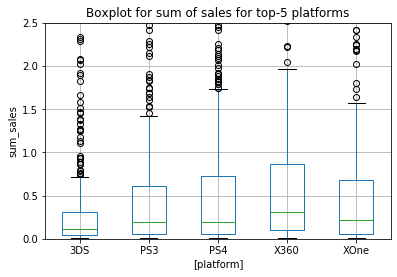

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
#строим диаграмму размаха
ax=games_top_sum.boxplot(by=['platform'],column=['sum_sales'])
ax.set_ylim(0, 2.5)
plt.title('Boxplot for sum of sales for top-5 platforms')
plt.suptitle('')
ax.set_label('platforms')
ax.set_ylabel("sum_sales")
plt.show()

По межквартильным размахам видно, что разброс продаж различается для каждой платформы. Этот разброс отображает разницу в продажах. Видно, что для всех платформ данные не симметричны, скошены вправо. Максимальное наблюдаемое значение продаж у платформы PS4, за ней у X360 и XOne. При этом разброс данных по продажам платформ PS4 и X360 примерно одинаков. Наиболее компактно выглядят данные для платформы 3DS. В тройку лидеров входят: XONe, X360 и PS4.

#### 3.4.2 Диаграмма размаха по средним продажам для топ-5 платформ

In [27]:
#создадим сводную таблицу с данными по средним продажам
games_top_mean=data_games_period_top_platform.pivot_table(index=['name','platform'], values=['sum_sales']).reset_index()
games_top_mean

,name,platform,sum_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Haikyu!! Cross Team Match!,3DS,0.04
4,Tales of Xillia 2,PS3,0.84
...,...,...,...
1814,Zumba Fitness: World Party,XOne,0.24
1815,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,0.05
1816,[Prototype 2],PS3,0.74
1817,[Prototype 2],X360,0.79


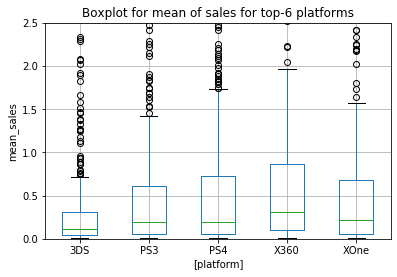

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
#строим диаграмму размаха
ax=games_top_mean.boxplot(by=['platform'],column=['sum_sales'])
ax.set_ylim(0, 2.5)
plt.title('Boxplot for mean of sales for top-6 platforms')
plt.suptitle('')
ax.set_label('platforms')
ax.set_ylabel("mean_sales")
plt.show()

Графики для средних значений такие же как для глобальных.

### 3.5 Влияние отзывов критиков и пользователей на продажу игр для PS4

In [29]:
#сделаем срез данных для PS4
data_for_ps4_critic=data_games_period_top_platform.query('platform=="PS4" & critic_score!=0.0')
data_for_ps4_user=data_games_period_top_platform.query('platform=="PS4" & user_score!=0.0')

Корреляция между отзывами критиков и продажами составляет 0.40656790206178095


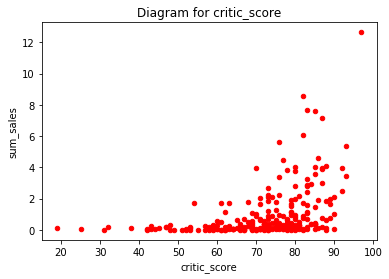

Корреляция между отзывами пользователей и продажами составляет -0.031957110204556424


Text(0.5, 1.0, 'Diagram for user_score')

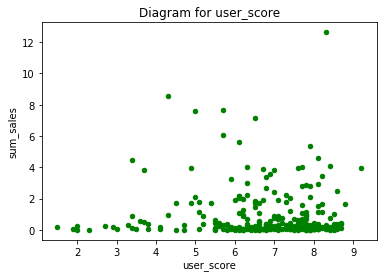

In [30]:
#корреляцию отзывов критиков и продаж
print('Корреляция между отзывами критиков и продажами составляет',data_for_ps4_critic['critic_score'].corr(data_for_ps4_critic['sum_sales']))
# диаграмма рассения для отзывов критиков
data_for_ps4_critic.plot(x='critic_score', y='sum_sales', kind='scatter', color='red')
plt.title('Diagram for critic_score')
plt.show()
#корреляцию отзывов пользователей и продаж
print('Корреляция между отзывами пользователей и продажами составляет',data_for_ps4_user['user_score'].corr(data_for_ps4_user['sum_sales']))
# диаграмма рассения для отзывов пользователей и продах
data_for_ps4_user.plot(x='user_score', y='sum_sales', kind='scatter', color='green')
plt.title('Diagram for user_score')

На обеих диаграммах есть нули, котороые были оставленны, так как их заполнение исказит картину данных. Данные по отзывам пользователей имеют больший разброс значния, хотя на обеих диаграмма плотность значений лежит в одинаковых регионах. При этом есть прямая зависимость между отзывами критиков и продажами, коэффициент корреляции 0.4, а корреляция между отзывами пользователей и продажами указывает на отстствие зависимости.

Для платформы PS4 уровень продаж слабо связан с отзывами критиков и пользователй, хотя у этой платформы самый высокий уровень продаж. Думаю, что для других платформ эта связь не будет ярко выражена.

### 3.6 Распределение продаж по жанрам

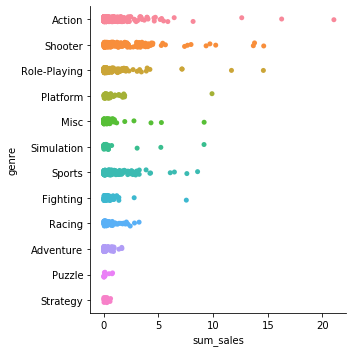

In [31]:
# построим график зависимости продаж от жанра
sns.catplot(x='sum_sales',y='genre', data=data_games_period_top_platform)

Жанры с наиболее высокими продажами: Action, Shooter, Role-Playing. Жанры с наименьшими продажами: Puzzle и Strategy.

## 4 Составляем портрет пользователя каждого региона

### 4.1 Топ 5 платформ по продажам в разных странах

In [32]:
# создаём сводную таблицу по продажам игр для платформ по регионам
data_sales=data_games_period.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'],
                                         aggfunc=('sum')).reset_index()

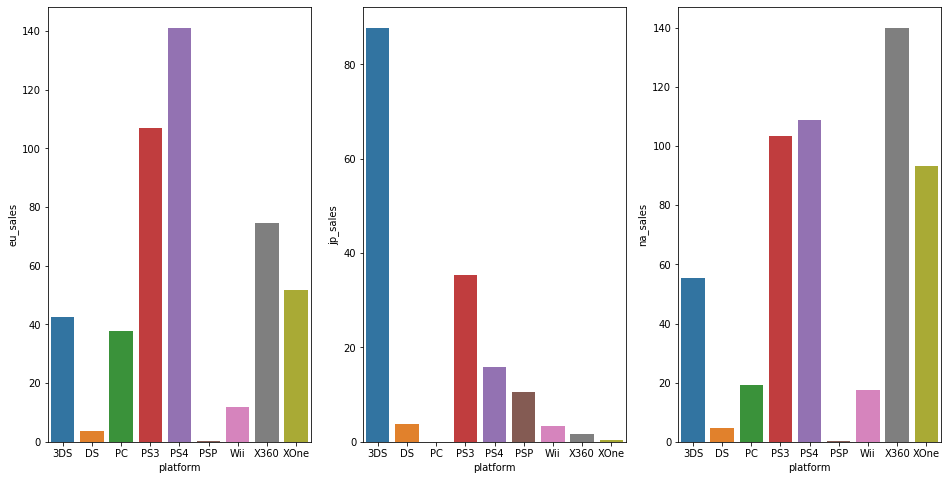

In [33]:
# строим графики, описывающие уровень продаж для каждой платформы по регионам
fig, axs=plt.subplots(1,3, figsize=(16,8))
sns.catplot(x='platform',y='eu_sales',kind='bar', data=data_sales, ax=axs[0])
sns.catplot(x='platform',y='jp_sales', kind='bar',data=data_sales, ax=axs[1])
sns.catplot(x='platform',y='na_sales', kind='bar',data=data_sales, ax=axs[2])
plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

Самые популярные платформы в Европе: 
1)PS3 
2)PS2 
3)X360 
4)Wii 
5)DS
Самые популярные платформы в Японии:
1)DS 
2)PS2 
3)3DS 
4)PS3 
5)PSP
Самые популярные платформы в Северной Америки:
1)X360 
2)PS2 
3)Wii 
4)PS3 
5)DS

### 4.2 Топ 5  самых популярных жанров

In [34]:
# создаём сводную таблицу по продажам игр по регионам
genre_sales=data_games_period.pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales'], aggfunc=('sum')).reset_index()
genre_sales

,genre,eu_sales,jp_sales,na_sales
0,Action,148.45,45.00,164.68
1,Adventure,8.80,5.96,8.26
2,Fighting,8.88,7.77,15.66
3,Misc,21.69,8.12,32.05
4,Platform,13.92,4.89,14.81
5,Puzzle,1.01,1.87,0.51
6,Racing,23.79,1.10,13.03
7,Role-Playing,46.48,56.87,60.81
8,Shooter,110.89,7.58,141.48
9,Simulation,14.51,10.37,7.82


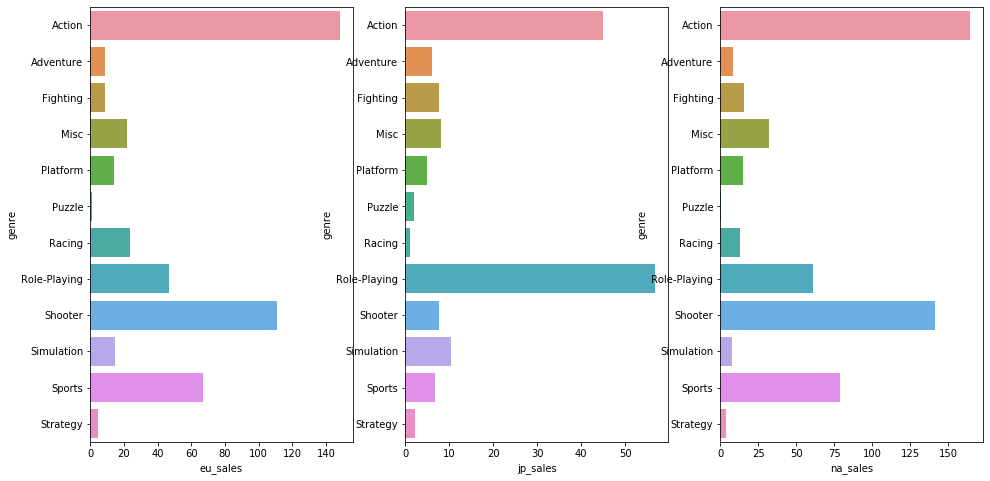

In [35]:
# строим графики, описывающие уровень продаж игра по жанрам для регионов
fig, axs=plt.subplots(1,3, figsize=(16,8))
sns.catplot(x='eu_sales',y='genre',kind='bar', data=genre_sales, ax=axs[0])
sns.catplot(x='jp_sales',y='genre', kind='bar',data=genre_sales, ax=axs[1])
sns.catplot(x='na_sales',y='genre', kind='bar',data=genre_sales, ax=axs[2])
plt.close(2)
plt.close(3)
plt.close(4)


<div> Самые популярные платформы в Европе: 
1)Action 
2)Shooter
3)Sports 
4)Role-playing  
5)Misc </div>
<div>
Самые популярные платформы в Японии:
1)Role-playing
2)Action 
3)Simulation 
4)Misc 
5)Shooter</div>
<div>
Самые популярные платформы в Северной Америке:
1)Action  
2)Shooter
3)Sports 
4)Role-playing 
5)Misc </div>

### 4.3 Изучим влияние рейтинга ESRB на продажи в отдельном регионе

In [36]:
# строим сводную тадлицу рейтинга ESRB и продаж в разных регионах
rating_sales=(data_games_period
    .query('rating != "NaN"')
    .pivot_table(index=['rating'], values=['na_sales','eu_sales','jp_sales'], aggfunc=('sum')).reset_index()
)    
rating_sales

,rating,eu_sales,jp_sales,na_sales
0,E,100.43,21.51,97.23
1,E10+,45.30,5.15,62.93
2,M,189.86,18.96,225.85
3,T,49.64,19.77,61.22


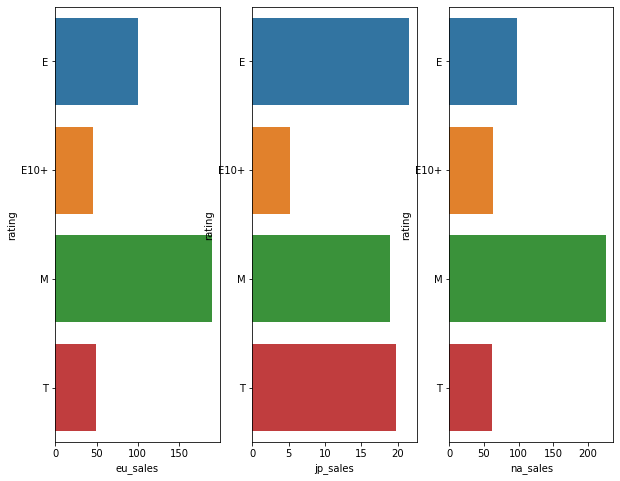

In [37]:
# построим график для наглядной интерпретации данных таблицы rating_sales
fig, axs=plt.subplots(1,3, figsize=(10,8))
sns.catplot(x='eu_sales',y='rating',kind='bar', data=rating_sales, ax=axs[0])#.title('Sales for platform in Europe')
sns.catplot(x='jp_sales',y='rating', kind='bar',data=rating_sales, ax=axs[1])#.title('Sales for platform in Japane')
sns.catplot(x='na_sales',y='rating', kind='bar',data=rating_sales, ax=axs[2])#.set_title('North America')
plt.close(2)
plt.close(3)
plt.close(4)


В Европе и Северной Америке наибольщей пополяностью пользуются игры с рейтингом М. В Японии- с рейтингов Е.

## 5. Проверка гипотез

### 5.1  Значима ли разница между пользовательскими рейтингами платформ Xbox One и PC4 

Нулевая гипотеза: нет разницы между пользовательскими рейтингами платформ Xbox One и PC4, они статистически равнозначны.
Альтернативная гипотеза: между пользовательскими рейтингами платформ Xbox One и PC4 есть разница, они не равны.

In [38]:
# создадим отдельные таблицы с данными для платформ XOne и PC
data_XOne=data_games_period.query('platform=="XOne" & user_score!=0.0')
data_PC=data_games_period.query('platform=="PC" & user_score!=0.0')

In [39]:
import seaborn as sns

Text(0, 0.5, 'частота')

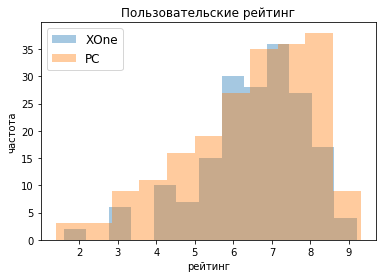

In [40]:
sns.distplot(data_XOne['user_score'],  kde=False, label='XOne')
sns.distplot(data_PC['user_score'],  kde=False,label='PC')
plt.legend(prop={'size': 12})
plt.title('Пользовательские рейтинг')
plt.xlabel('рейтинг')
plt.ylabel('частота')

Графики имеют разное распределение данных. Нужно проверить дисперсию выборок, чтобы получить наиболее точные результаты.

In [41]:
# считаем дисперсию
import numpy as np
variance_XOne = np.var(data_XOne['user_score'], ddof=1)
variance_PC = np.var(data_PC['user_score'], ddof=1)
print('Дисперсия для variance_XOne равна', '{:.2f}'.format(variance_XOne))
print('Дисперсия для variance_PC равна', '{:.2f}'.format(variance_PC))

Дисперсия для variance_XOne равна 1.91
Дисперсия для variance_PC равна 2.77


Дисперсии выборок различаются.

In [42]:
# проверка нулевой гипотезы
from scipy import stats as st
import numpy as np
alpha = 0.05
results =st.ttest_ind(
    data_XOne['user_score'],
    data_PC['user_score'],
    equal_var = False)
print('p-значение:','{:.2f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.55
Не получилось отвергнуть нулевую гипотезу


Между пользователькими рейтингами для платформ PC и XOne существует статистическая разница. На графиках, приведённых выше было видно, что  игры на платформ XOne имеют больший спрос.

### 5.2 Значима ли разница между средними пользовательскими рейтингами жанров Action  и Sports 

Нулевая гипотеза: нет разницы между средними пользовательскими рейтингами жанров Action и Sports, они статистически равнозначны.
Альтернативная гипотеза: между средними пользовательскими рейтингами жанров Action и Sports есть разница, они не равны.

In [43]:
## создадим отдельные таблицы с данными для жанров Action и Sports
genre_action=data_games_period.query('genre=="Action" & user_score!=0.0').reset_index(drop=True)
genre_sports=data_games_period.query('genre=="Sports" & user_score!=0.0').reset_index(drop=True)

Text(0, 0.5, 'частота')

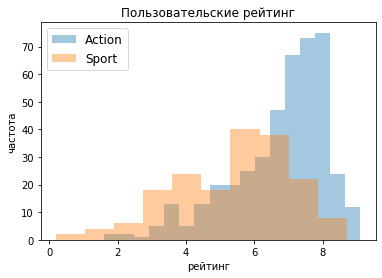

In [44]:
#построим графикраспределения для каждой таблицы
sns.distplot(genre_action['user_score'],  kde=False, label='Action')
sns.distplot(genre_sports['user_score'],  kde=False,label='Sport')
plt.legend(prop={'size': 12})
plt.title('Пользовательские рейтинг')
plt.xlabel('рейтинг')
plt.ylabel('частота')

Гистограммы распределения рейтинга пользователей для жанров Action и Sports различаются. Жанр Action имеет большую частоту высоких рейтингов, при этом рейтинг жанр Sport распределён более равномерно.

In [45]:
# считаем дисперсию
variance_action = np.var(genre_action['user_score'], ddof=1)
variance_sports = np.var(genre_sports['user_score'], ddof=1)
print('Дисперсия для variance_action равна', '{:.2f}'.format(variance_action))
print('Дисперсия для variance_sports равна', '{:.2f}'.format(variance_sports))

Дисперсия для variance_action равна 1.91
Дисперсия для variance_sports равна 2.88


Дисперсии выборок различаются.

In [46]:
#проверяем нулевую гипотезу
alpha = 0.05
results =st.ttest_ind(
    genre_action['user_score'],
    genre_sports['user_score'],
    equal_var = False)
print('p-значение:',results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.146673984407235e-19
Отвергаем нулевую гипотезу


Между пользователькими рейтингами жанров Action и Sports нет статистической разницы.

## Вывод

<div> Проведен анализ данных исходной таблицы. Заполнены пропущенные значения там, где это возможно и не приведет к искажению результатов. Проведена замена типов данных. </div>
<div> В таблице были приведены данные по продажам игр с 1980 по 2016. Исходя из данных таблицы games_in_year были выделены актуальные даты, по которым в дальнейшем будет строиться анализ данных и прогноз на 2017 год: период с 2012 по 2016 год.</div>
<div> На указанном промежутке времени было установленно, что срок 'жизни' платформ составляет 7-12 лет, за исключением PC, так как это не только платформа для игр.</div>
<div> На данный момент в топ-5 входят платформы PS3, PS4, X360,XOne,3DS. </div>
<div> Было установленно, что отзывам критиков при покупке игры доверяют больше, чем отзывам других пользователей.</div>
<div> Также, самые полярные жанры игр: Action, Shooter и  Role-Playing.</div>
<div> Если рассматривать результаты отдельно для регионов, то в Северной Америки наиболее популярна платформа X360 и жанр Action.  В Японии платформа DS  и жанр Role-playing, при этом жанр Action  на втором месте. В Европе платформа PS3 и жанр Action. </div>

<div> Общие рекомендации:</div>

<div>На 2016 год есть 5 актуальных платформ. Самые прибыльные из них PS3 и X360, но игры для них должны перестать выходить в ближайший год или два. Платформы, продажи по которым набирают обороты это PS4, 3DS и XOne.</div>
<div> Если компания ориентируется на мировой рынок ей стоит выпустить в 2017 игру на PS3 или PS4 жанре Action. Следует ожидать наибольшую прибыль из продаж в Европе.</div>
<div> Если компания планирует выпуск игры в Японии, то больше подойдёт игра в жанре Role-Playing на платформу 3DS.</div> У Северной Америки  разнообразные предпочтения, но стоит сосредоточиться на платформе X360, либо развивающейся , занимающей третье место по продажам после устаревших X360 и PS2. Либо на развивающихся XOne и PS4. Прибыльней всего также будет жанр Action.